In [12]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=6, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])    # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 6.37904965 -6.46617328]
 [-3.68184554 -7.99863488]
 [-9.62684116  8.41544735]
 [-7.69329744  7.94546313]
 [-0.12429246  9.88024713]
 [-7.55625118  7.36572491]
 [ 6.60814512 -6.97680769]
 [-0.33809159  8.76509668]
 [ 4.39720855 -3.29024363]
 [-8.7451733   6.97444847]]
(100,) [2 5 4 1 3 1 2 3 0 4]


,X,Y
0,6.379050,-6.466173
1,-3.681846,-7.998635
2,-9.626841,8.415447
3,-7.693297,7.945463
4,-0.124292,9.880247


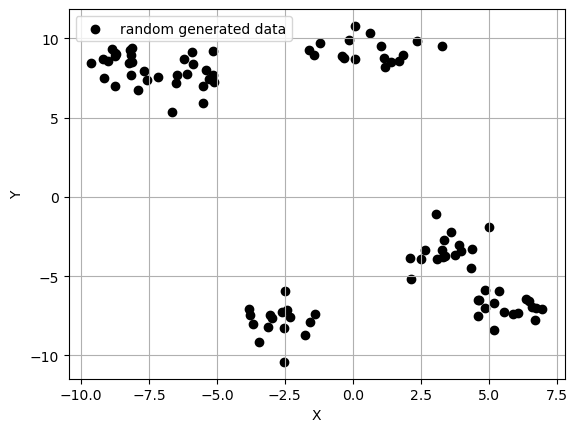

In [13]:
#축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

In [14]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용 
kmeans_cluster = KMeans(n_clusters=6)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4 5]


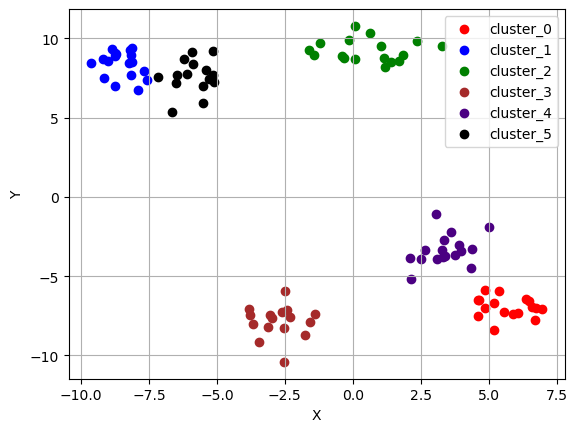

In [17]:
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo', 5:'black'} 

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(6):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# K-means 알고리즘이 잘 동작하지 않는 예시들

-다음 코드를 통해 어떤 특성의 데이터들이 K-means 알고리즘을 적용하였을 때 잘 군집화되지 않는지 살펴보도록 하겠습니다.

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


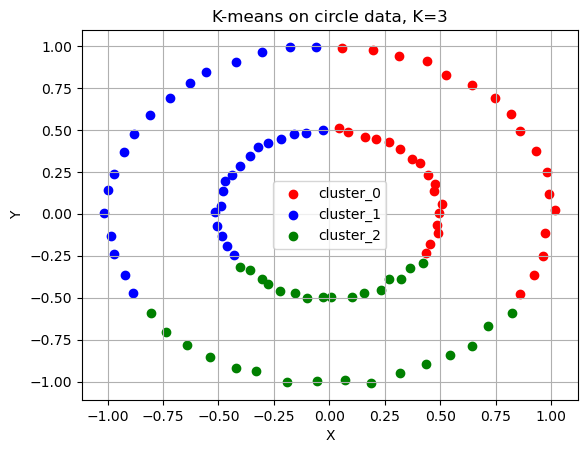

In [18]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
# 원형 분포를 가지는 점 데이터 100개를 생성합니다.
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) 


# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=3)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=3')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()


c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


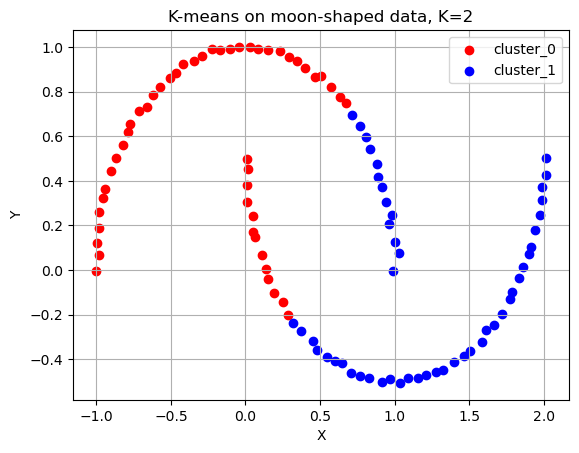

In [9]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
# 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) 

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()